## Week 2: 11/20/21-11/26/21

Below is the data for my initial stocks this week:

| Symbol | Company | Description | Purchase Price | Quantity | Total Value (Current) |
| :--- | :--- | :--- | :--- | :--- | :--- |
| ABBV | Abbvie Inc | Biopharmaceutical | 116.94 | 20 | 2338.80 |
| ABC | Amerisourcebergen Corp. | Drug wholesale | 125.10 | 20 | 2502.00 |
| COST | Costco Wholesale Corp | Retail| 517.01 | 485 | 250774.10 |
| DELL | Dell Technologies Inc | Computer Technology | 56.73 | 100 | 5673.00 |
| TM | Toyota Motor Crp | Automotive Manufacturer | 178.47 | 50 | 13449.25 |
| | | | | Total | 274737.15 |

### Log

Last week I saw a classmate used a Stock Price Prediction and Forecasting Using Stacked LSTM found at https://www.youtube.com/watch?v=H6du_pfuznE.  So this week I decided to add it to my code to help with predictions. The version I made predicts prices only for the next week.

If the prediction looks favorable I am also looking to sell some of my least profitable stock for Microsoft stock since it seems to be one of the most popular with my classmates.  

There will be a new heading indicating where the new code starts.  

In [75]:
#old code since it seems to work
#setup
!pip install pandas_datareader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

#yahoo finance
from pandas_datareader.data import DataReader

#stock abbrev to analyze
list = ['ABBV','ABC','COST','DELL','MSFT','TM']

#setting up what dates to gather: from last yr - current yr
stop = datetime.now()
start = datetime(stop.year-1, stop.month, stop.day)

for stock in list:
    globals()[stock] = DataReader(stock, 'yahoo', start, stop)

### Graphs of Adj Close from this past year

Text(0.5, 1.0, 'Abbvie Adj Close')

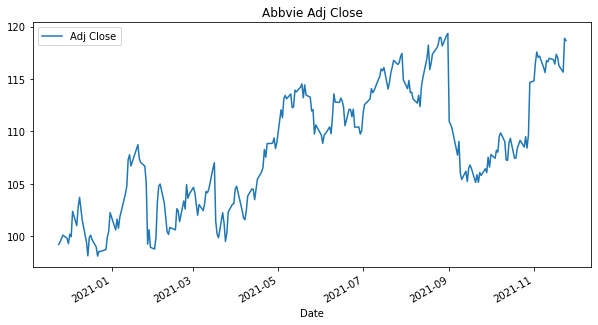

In [76]:
ABBV['Adj Close'].plot(legend = 1, figsize=(10,5))
plt.title('Abbvie Adj Close')

Text(0.5, 1.0, 'Amerisourcebergen Adj Close')

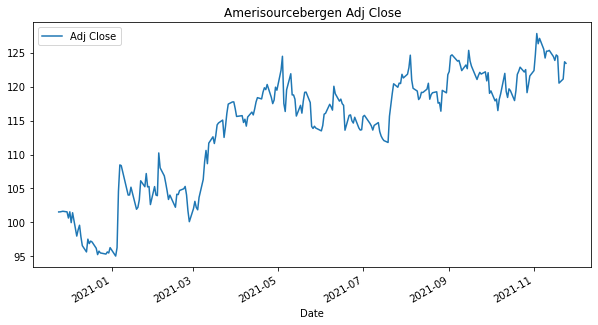

In [77]:
ABC['Adj Close'].plot(legend = 1, figsize=(10,5))
plt.title('Amerisourcebergen Adj Close')

Text(0.5, 1.0, 'Costco Adj Close')

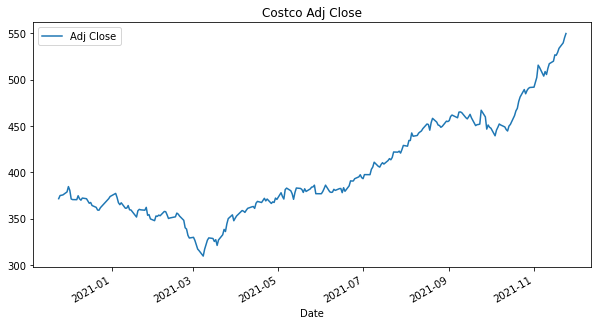

In [78]:
COST['Adj Close'].plot(legend = 1, figsize=(10,5))
plt.title('Costco Adj Close')

Text(0.5, 1.0, 'Dell Adj Close')

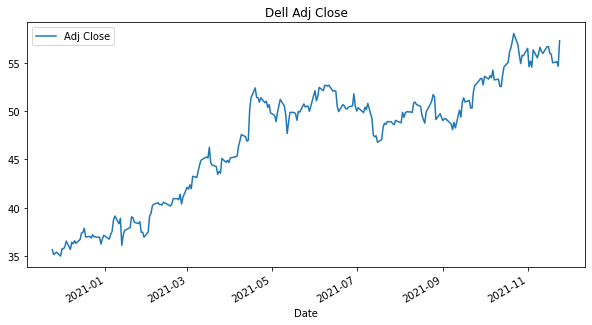

In [79]:
DELL['Adj Close'].plot(legend = 1, figsize=(10,5))
plt.title('Dell Adj Close')

Text(0.5, 1.0, 'Toyota Adj Close')

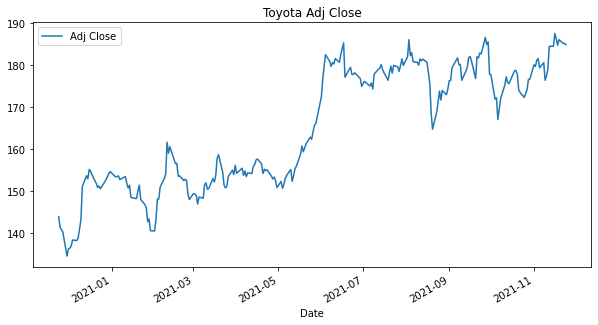

In [80]:
TM['Adj Close'].plot(legend = 1, figsize=(10,5))
plt.title('Toyota Adj Close')

## Checking Microsoft stock 

Text(0.5, 1.0, 'Microsoft Adj Close')

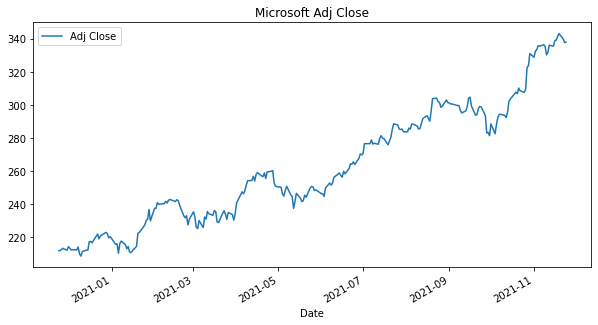

In [81]:
MSFT['Adj Close'].plot(legend = 1, figsize=(10,5))
plt.title('Microsoft Adj Close')

## Attempt 2 

### Monte Carlo 

I will be useing largely the same code from last week in this portion.  Since I know the code from last week works I can use it to compare my results from the new simulation. 

In [82]:
#all closing prices into one data frame
closing = DataReader(['ABBV','ABC','COST','DELL', 'MSFT', 'TM'], 'yahoo', start, stop)['Adj Close']

#check
closing.describe()

Symbols,ABBV,ABC,COST,DELL,MSFT,TM
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,108.374226,114.020891,401.555879,47.242514,263.133638,165.010395
std,5.862796,8.425873,53.830436,6.240792,35.874418,14.354952
min,98.094849,95.046410,309.671936,34.987328,208.770035,134.460007
25%,103.142342,106.330818,361.819092,41.403954,234.328766,152.850006
50%,108.353767,116.541595,381.476593,49.361378,256.279602,164.660004
75%,113.444656,119.906807,448.614227,51.398884,292.345154,178.899994
max,119.333267,127.820480,549.729980,58.053726,343.109985,187.429993


In [83]:
#daily returns as a percentage
daily = closing.pct_change()

#risk
risk = daily.dropna()

#time and delta value
days = 7 #1 week since that is our time limit
delta = 1/days

def monte_carlo(mu, sig, days, start):
    #define price array
    price = np.zeros(days) ##array full of 0s
    price[0] = start
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    #calculations for the price array for the number of days
    for x in range(1,days):
        shock[x] = np.random.normal(loc = mu * delta, scale = sig * np.sqrt(delta))
        drift[x] = mu * delta
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

Text(0.5, 1.0, 'MC for ABBV stock')

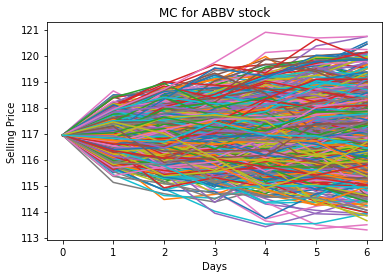

In [84]:
#variable to hold name sp i dont have to rewrite code like last time
#['ABBV','ABC','COST','DELL','MSFT','TM']
abbr = 'ABBV'

mu = daily.mean()[abbr]
sig = daily.std()[abbr]
start = 116.94 #initial price

simulations = np.zeros(1000)

for run in range(1000):
    simulations[run] = monte_carlo(mu,sig,days,start)[days-1]
    plt.plot(monte_carlo(mu,sig,days,start))
    
#plot
plt.xlabel('Days') 
plt.ylabel('Selling Price')
plt.title(f'MC for {abbr} stock')    

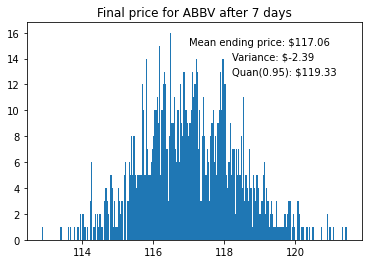

In [85]:
#95 percentile
quant = np.percentile(simulations,95)

#plot end prices
plt.hist(simulations, bins = 250)

#mean ending 
#$%.2f special two after point
plt.figtext(0.5, 0.80, 'Mean ending price: $%.2f'%simulations.mean())

#variance
plt.figtext(0.6, 0.75, 'Variance: $%.2f'%(start-quant,))

#5% 
plt.figtext(0.6, 0.70, 'Quan(0.95): $%.2f'% quant)

#after string /s
plt.title(f'Final price for {abbr} after %s days' %days)


del list #delete previous list array so i can use later

## New 

### Stock Market Prediction and Forecasting Using Stacked LSTM

#### Definitions

**RNN** - recurrent neural network - networks with loops in them which allows information to persist

- can be thought of as multple copies of the same network that passes information off to its successors

**LSTM** - long short-term memory - a type of RNN that is capable of learning long term dependencies

- instead of having a single neural network there are four

- has the ability to add or remove information to the cell states

- has three gates to protect and control the cell state


### First Step: Collecting Stock Data

In [12]:
import pandas_datareader as pdr

#api key
key = 'd233572c2e1b0a7f81df2f49468f4b963d9362d0'

In [33]:
#collecting stock data
#['ABBV','ABC','COST','DELL','MSFT','TM']
abbr = 'ABBV'#abbreviation for stock market
df = pdr.get_data_tiingo(abbr, api_key=key)
df.to_csv(f'{abbr}.csv')
df.tail() #check end date

close    high     low    open   volume  \
symbol date                                                                 
ABBV   2021-11-17 00:00:00+00:00  117.35  117.62  116.25  116.60  4361522   
       2021-11-18 00:00:00+00:00  117.07  118.37  116.64  117.41  3161016   
       2021-11-19 00:00:00+00:00  116.24  117.80  115.86  117.63  5885750   
       2021-11-22 00:00:00+00:00  115.65  117.34  115.01  115.95  3976104   
       2021-11-23 00:00:00+00:00  118.88  119.33  116.15  116.56  8948673   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
ABBV   2021-11-17 00:00:00+00:00    117.35   117.62  116.25   116.60   
       2021-11-18 00:00:00+00:00    117.07   118.37  116.64   117.41   
       2021-11-19 00:00:00+00:00    116.24   117.80  115.86   117.63   
       2021-11-22 00:00:00+00:00    115.65   117.34  115.01   115.95   
       2021-11-23 00:00:00+00:00    118.88   119.33  116.15   116.56   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
ABBV   2021-11-17 00:00:00+00:00    4361522      0.0          1.0  
       2021-11-18 00:00:00+00:00    3161016      0.0          1.0  
       2021-11-19 00:00:00+00:00    5885750      0.0          1.0  
       2021-11-22 00:00:00+00:00    3976104      0.0          1.0  
       2021-11-23 00:00:00+00:00    8948673      0.0          1.0

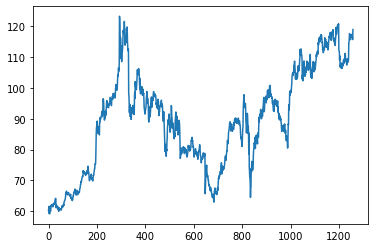

In [34]:
#isolate close column
close_price = df.reset_index()['close']

#compare plot to one above
plt.plot(close_price)

In [35]:
#before transformation
close_price

0        60.51
1        59.46
2        61.59
3        60.80
4        59.16
         ...  
1253    117.35
1254    117.07
1255    116.24
1256    115.65
1257    118.88
Name: close, Length: 1258, dtype: float64

In [36]:
from sklearn.preprocessing import MinMaxScaler

#value from btw 0-1
scaler = MinMaxScaler(feature_range=(0,1))
close_price = scaler.fit_transform(np.array(close_price).reshape(-1,1))

#after 
close_price

array([[0.02107728],
       [0.00468384],
       [0.03793911],
       ...,
       [0.89117877],
       [0.88196721],
       [0.93239657]])

### Second Step: Preprocess Data

In [37]:
#split data into train and test split
training_size = int(len(close_price)*.65) #split percentage is 65%
test_size = len(close_price) - training_size
train_data = close_price[0:training_size,:]
test_data = close_price[training_size:len(close_price),:1]

#check
training_size, test_size, len(train_data), len(test_data)

(817, 441, 817, 441)

In [38]:
#preserve time, use past to predict the future but vice versa is not true
def create_dataset(dataset, time_step = 1):
    datax, datay = [], []
    for i in range(len(dataset) - time_step -1):
        a = dataset[i:(i+time_step), 0]
        datax.append(a)
        datay.append(dataset[i + time_step, 0])
    return np.array(datax), np.array(datay)

#train test split
time_step = 100 #number of features
train_x, train_y = create_dataset(train_data, time_step)
test_x, test_y = create_dataset(test_data, time_step)

### Third Step: Create a Stacked LSM model

In [39]:
#in order to create a stacked LSM model need to reshape input into
#[samples, time_steps, features] which is required for LSTM - 3D
train_x = train_x.reshape(train_x.shape[0],train_x.shape[1] , 1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1] , 1)

#create the stacked LSM model
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [40]:
tf.__version__

'2.7.0'

In [41]:
#creating a nested LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) 
model.add(LSTM(50,return_sequences=True))#stacked
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 192ms/step - loss: 0.0726 - val_loss: 0.0163
Epoch 2/100
12/12 [==============================] - 1s 116ms/step - loss: 0.0127 - val_loss: 0.0057
Epoch 3/100
12/12 [==============================] - 1s 119ms/step - loss: 0.0082 - val_loss: 0.0175
Epoch 4/100
12/12 [==============================] - 1s 116ms/step - loss: 0.0063 - val_loss: 0.0073
Epoch 5/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0053 - val_loss: 0.0039
Epoch 6/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0050 - val_loss: 0.0041
Epoch 7/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0047 - val_loss: 0.0045
Epoch 8/100
12/12 [==============================] - 1s 116ms/step - loss: 0.0045 - val_loss: 0.0033
Epoch 9/100
12/12 [==============================] - 1s 117ms/step - loss: 0.0044 - val_loss: 0.0033
Epoch 10/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0042 - val_lo

Epoch 81/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0012 - val_loss: 7.8979e-04
Epoch 82/100
12/12 [==============================] - 1s 123ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 83/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0013 - val_loss: 6.8484e-04
Epoch 84/100
12/12 [==============================] - 1s 120ms/step - loss: 0.0011 - val_loss: 9.4190e-04
Epoch 85/100
12/12 [==============================] - 1s 119ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 86/100
12/12 [==============================] - 1s 122ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 87/100
12/12 [==============================] - 1s 123ms/step - loss: 0.0014 - val_loss: 9.6397e-04
Epoch 88/100
12/12 [==============================] - 1s 119ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 89/100
12/12 [==============================] - 1s 121ms/step - loss: 0.0011 - val_loss: 7.1749e-04
Epoch 90/100
12/12 [==============================] - 1s 119ms

## Step 4: Predict the test data and plot the output

In [43]:
#prediction for x_train and x_test
train_predict = model.predict(train_x)
test_predict = model.predict(test_x)

#back into og data
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

#calculate RMSE performance metrics
import math

from sklearn.metrics import mean_squared_error

#result for training dataset
math.sqrt(mean_squared_error(train_y,train_predict))

86.16531570089579

In [44]:
#results for test data RMSE
math.sqrt(mean_squared_error(test_y,test_predict))

104.64403836468468

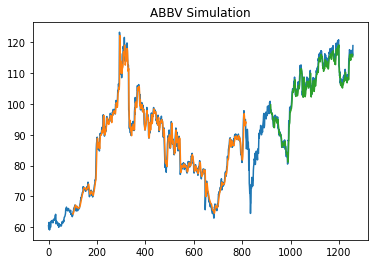

In [45]:
#plot the graph
look_back=100
trainPredictPlot = np.empty_like(close_price)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

#shift test predictions for plotting
testPredictPlot = np.empty_like(close_price)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_price) - 1, :] = test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(close_price))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title(f'{abbr} Simulation')
plt.show()

#test prediction in green, orange is train prediction, blue whole set data

## Step 5: Predict the future 

In [46]:
len(test_data)

441

In [47]:
from numpy import array

num = len(test_data) - 100

#to use 100 data points for prediction value 341
x_input = test_data[num:].reshape(1,-1)
x_input.shape #check

(1, 100)

In [48]:
#make list of previous 100 data
temp_input = list(x_input)
temp_input = temp_input[0].tolist() 

In [49]:
lst_output = []
n_steps = 100
i = 0
while(i < 7): #predict next week
    
    if(len(temp_input) > 100): #more than 100 shift one position to right 

        #print(temp_input)
        x_input = np.array(temp_input[1:]) #shift one to right new op as ip
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1) #reshape
        x_input = x_input.reshape((1, n_steps, 1))
        
        #print(x_input)
        y_pred = model.predict(x_input, verbose=0) #predict
        print("{} day output {}".format(i,y_pred))
        temp_input.extend(y_pred[0].tolist())
        temp_input = temp_input[1:]
        
        #print(temp_input)
        lst_output.extend(y_pred.tolist())
        i = i + 1
    else:
        #use the 100 data point to predict
        x_input = x_input.reshape((1, n_steps,1)) #reshapes the data like before
        y_pred = model.predict(x_input, verbose=0)
        print(y_pred[0])
        temp_input.extend(y_pred[0].tolist())
        print(len(temp_input))

        #add to the temp_input
        lst_output.extend(y_pred.tolist()) 
        i = i + 1
    

print(lst_output)

[0.90043086]
101
1 day input [0.8991413  0.89289617 0.89648712 0.91288056 0.91725215 0.90866511
 0.9058548  0.9108509  0.87837627 0.88821233 0.90288837 0.91147541
 0.92162373 0.91537861 0.91803279 0.92724434 0.93224044 0.89211553
 0.87884465 0.89133489 0.87306792 0.87369243 0.86323185 0.85714286
 0.86900859 0.8518345  0.88181109 0.89492584 0.92505855 0.94457455
 0.90757221 0.9175644  0.9314598  0.93989071 0.94488681 0.95612802
 0.95612802 0.94332553 0.9587822  0.96206089 0.82919594 0.82529274
 0.81904762 0.77861046 0.79937549 0.75113193 0.74192037 0.75441062
 0.73879781 0.75893833 0.7637783  0.75831382 0.73754879 0.74925839
 0.73770492 0.75253708 0.74800937 0.75815769 0.75222482 0.77564403
 0.76049961 0.77954723 0.77392662 0.78610461 0.78313817 0.80733802
 0.81217799 0.79906323 0.77142857 0.77080406 0.77673692 0.7832943
 0.75362998 0.75394223 0.76893052 0.774395   0.78032787 0.77033568
 0.78579235 0.7687744  0.78860265 0.86666667 0.86885246 0.89570648
 0.91194379 0.90398126 0.9058548  

In [50]:
#graph
new_day = np.arange(1,101) #previous 100 
prediction_day = np.arange(101,108) #week prediction

#by doing this I was able to catch my error I originlly hardcoded a value
len(close_price)

1258

Text(0.5, 1.0, 'ABBV Prediction')

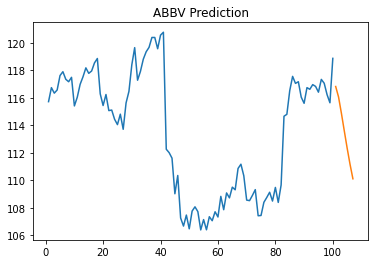

In [51]:
num = len(close_price) - 100

plt.plot(new_day,scaler.inverse_transform(close_price[num:]))
plt.plot(prediction_day,scaler.inverse_transform(lst_output))
plt.title(f'{abbr} Prediction')

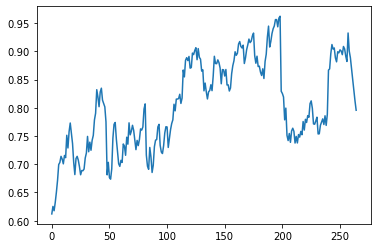

In [52]:
#combine to see all data
predict = close_price.tolist()
predict.extend(lst_output) #adding output to end
plt.plot(predict[1000:])

# Conclusion

As not to rewrite the code like last time I used the variable abbr to hold the name of the stock. 

Since the size of the data varies I had to adjust my code multiple times since I originally hardcoded values for only my ABBV stock. My code should now run for any stock.

## Monte Carlo

### Stock owned

| Symbol | Company | Description | Mean Ending Price | Approx. Risk | Loss/Gain per stock|
| :--- | :--- | :--- | :--- | :--- | :--- |
| ABBV | Abbvie Inc | Biopharmaceutical | 117.06 | 6 | +0.12 |
| ABC | Amerisourcebergen Corp. | Drug wholesale | 125.36 | 6 | +0.26 |
| COST | Costco Wholesale Corp | Retail | 518.36 | 25 | +1.35 |
| DELL | Dell Technologies Inc | Computer Technology | 56.94 | 3 | +.21 |
| TM | Toyota Motor Crp | Automotive Manufacturer | 178.74 | 10 | +.27 |
| | | | Total  Gain/Loss per stock | +2.17 |

The gain this week for both ABBV and TM is predicted to be lower according to my Monte Carlo simulation.  Meanwhile COST stocks look to be predicted to be higher.  Meanwhile both ABC, DELL remain the same as last week.

### Stock I'm looking to buy

| Symbol | Company | Description | Mean Ending Price | Approx. Risk | Loss/Gain per stock|
| :--- | :--- | :--- | :--- | :--- | :--- |
| MSFT | Microsoft | Retail | 338.73 | 20 | +1.05 |

If I buy MSFT stock my Monte Carlo simulation predicts I'll make more than my ABBV and TM stock.  However, the risk is also a lot higher.  


## Stacked LSTM Model

### Stock owned

| Symbol | Company | Description | General Loss/Gain |
| :--- | :--- | :--- | :--- | 
| ABBV | Abbvie Inc | Biopharmaceutical | Loss | 
| ABC | Amerisourcebergen Corp. | Drug wholesale | Loss | 
| COST | Costco Wholesale Corp | Retail | Slight Loss |
| DELL | Dell Technologies Inc | Computer Technology | Slight Gain |
| TM | Toyota Motor Crp | Automotive Manufacturer | Gain | 

### Stock I'm looking to buy

| Symbol | Company | Description | General Loss/Gain |
| :--- | :--- | :--- | :--- |
| MSFT | Microsoft | Retail | Gain |


## Decision

Due to the predictions of the Stacked LSTM Model and my Monte Carlo Simulation both predicting a favorable outcome for Microsoft I decided to buy some stock.  Since both simulations predicted a loss for ABBV I decided to sell my stock for it.  Furthermore, I decided to sell some Dell stock since there was only a slight gain predicted with my LSTM model and I got a neutral result from my Monte Carlo Simulation.

### Trades

**Sell**

| Symbol | Company | Description | Sell Price | Quantity | Total Value |
| :--- | :--- | :--- | :--- | :--- | :--- |
| ABBV | Abbvie Inc | Biopharmaceutical | 336.07 | 10 | 3360.70 |
| DELL | Dell Technologies Inc | Computer Technology |  57.28 | 50 | 2864.00 | 

**Buy**

| Symbol | Company | Description | Purchase Price | Quantity | Total Value |
| :--- | :--- | :--- | :--- | :--- | :--- |
| MSFT | Microsoft | Retail | 336.07 | 10 | 3360.70 |
